In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [13]:
url = 'https://newzoo.com/insights/rankings/top-25-companies-game-revenues/'
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")

In [21]:
column_headers = [th.getText() for th in soup.findAll('th')]
column_headers 

['Image', 'Rank', 'Company', 'Q1', 'Q2', 'Q3', 'Q4', 'Full Year', ' Change']

In [15]:
data_rows = soup.findAll('tr')[1:]  # skip the first 2 header rows
#type(data_rows)  # now we have a list of table rows

In [16]:
company_data = [[td.getText() for td in data_rows[i].findAll(['td','th'])] for i in range(len(data_rows))]

In [17]:
new_company_data = []  # create an empty list to hold all the data

for i in range(len(data_rows)):  # for each table row
    company_row = []  # create an empty list for each pick/company

    # for each table data element from each table row
    for td in data_rows[i].findAll('td'):        
        # get the text content and append to the company_row         
        tdtext = []
        for i in td.getText():
            if i=="\n" or i=="\t":
                continue
            else:
                tdtext.append(i)
        
        tdtext = "".join(tdtext)    

        company_row.append(tdtext)        
        
    # then append each pick/company to the company_data matrix
    new_company_data.append(company_row)


In [31]:
df = pd.DataFrame(new_company_data, columns=column_headers)
#print(column_headers)
#df.to_csv("Top 25 companies game revenue.csv", encoding='utf-8')
#df.head(25)
type(new_company_data)
print(new_company_data)

[['', '1', 'Tencent ', '2460', '2466', '2616', '2659', '10201', '17%'], ['', '2', 'Sony*', '1796', '1637', '1695', '2709', '7837', '33%'], ['', '3', 'Activision Blizzard', '1455', '1570', '1568', '2014', '6607', '42%'], ['', '4', 'Microsoft*', '1593', '1427', '1363', '2094', '6477', '9%'], ['', '5', 'Apple*', '1316', '1402', '1494', '1652', '5864', '32%'], ['', '6', 'EA', '1308', '1271', '898', '1149', '4626', '8%'], ['', '7', 'NetEase', '933', '969', '985', '1290', '4177', '50%'], ['', '8', 'Google*', '837', '930', '985', '1313', '4065', '37%'], ['', '9', 'Bandai Namco', '465', '552', '469', '506', '1991', '19%'], ['', '10', 'Nintendo', '377', '312', '287', '856', '1831', '6%'], ['', '11', 'Square Enix ', '417', '321', '348', '580', '1666', '37%'], ['', '12', 'Warner Bros', '450', '368', '367', '421', '1606', '27%'], ['', '13', 'Ubisoft ', '697', '155', '158', '591', '1602', '57%'], ['', '14', 'TakeTwo Interactive', '378', '312', '420', '476', '1586', '19%'], ['', '15', 'Nexon', '491'

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

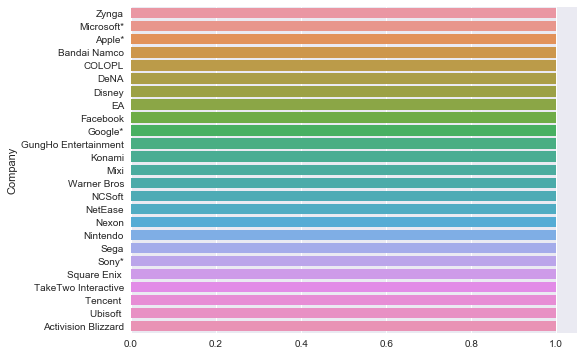

In [29]:
platGenre = pd.crosstab(df.Company,df.Q1)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "TOP 25 COMPANIES BY GAME REVENUES(2016/12)"
plt.xlabel = "Full year revenue"
plt.show()